In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [ ]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
eyeglasses_classifier =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
smile_calssifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')


### Face and eyes Detection from camera

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame= cap.read()
    frame_gray= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(frame_gray,1.13,3,minSize=(50,50))
    for face in faces:
        x,y,w,h = face
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),1)
        face_gray=frame_gray[ y:y+h , x:x+w ]
#         eyes = eye_classifier.detectMultiScale(face_gray,2.1,2)
        eyes = eyeglasses_classifier.detectMultiScale(face_gray,2.0,4,minSize=(20,20))  # detect eye with glasses or without
        
        for eye in eyes:
            x1,y1,w1,h1 = eye
            cv2.rectangle(frame,(x+x1,y+y1),(x+x1+w1,y+y1+h1),(0,255,0),2)
    cv2.imshow('face detection',frame)
    k= cv2.waitKey(1)
    if k== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Face and Smile Detection in image

1


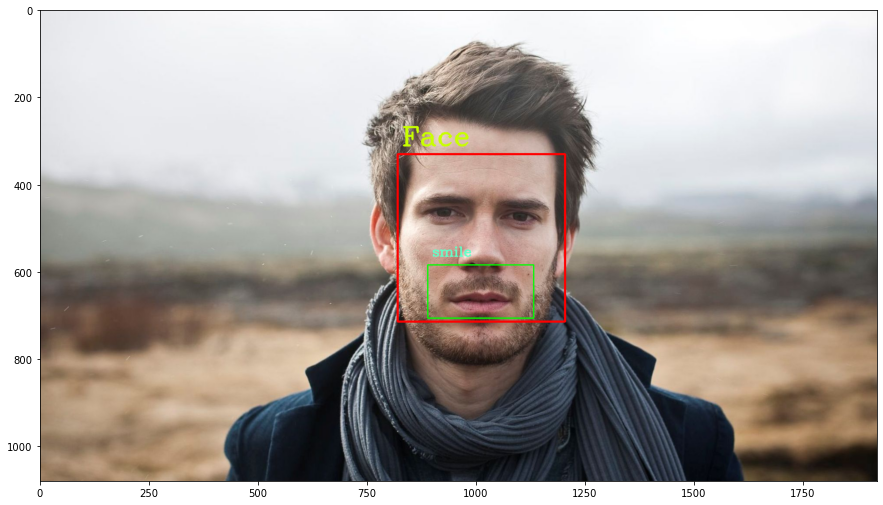

In [ ]:
img = cv2.imread('images/man3.jpg')
gray = cv2.imread('images/man3.jpg',0)
faces = face_classifier.detectMultiScale(gray, scaleFactor = 2.0,minNeighbors = 5,
                                    minSize = (100,100))
for face in faces:
    x,y,w,h = face
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
    cv2.putText(img,'Face',(x+10,y-20),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,200),3)
    face_gray=gray[ y:y+h , x:x+w ]
    smiles = smile_calssifier.detectMultiScale(face_gray,1.05,2,minSize=(100,100))   
        
    for smile in smiles:
        x1,y1,w1,h1 = smile
        cv2.rectangle(img,(x+x1,y+y1),(x+x1+w1,y+y1+h1),(0,255,0),2)
        cv2.putText(img,'smile',(x+x1+10,y+y1-20),cv2.FONT_HERSHEY_COMPLEX,1,(200,255,100),2)
print(len(faces))
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])

### Face and Smile Detection from camera


In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame= cap.read()
    frame_gray= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(frame_gray,1.3,5)
    for face in faces:
        x,y,w,h = face
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),1)
        face_gray=frame_gray[ y:y+h , x:x+w ]
        smiles = smile_calssifier.detectMultiScale(face_gray,1.8,2,minSize=(80,80))  
        
        for smile in smiles:
            x1,y1,w1,h1 = smile
            cv2.rectangle(frame,(x+x1,y+y1),(x+x1+w1,y+y1+h1),(0,255,0),2)
    cv2.imshow('face detection',frame)
    k= cv2.waitKey(1)
    if k== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()